In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')


In [4]:
# Check for missing values
print(df.isnull().sum())


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [14]:
# summary statistics
df.describe()

,Date,Age,Quantity,Price per Unit,Total Amount,Month,Year
count,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,6.549000,2023.002000
min,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,1.000000,2023.000000
25%,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,4.000000,2023.000000
50%,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,6.000000,2023.000000
75%,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,10.000000,2023.000000
max,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,12.000000,2024.000000
std,NaN,13.68143,1.132734,189.681356,559.997632,3.452755,0.044699


In [5]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])


In [6]:
# Create new columns for month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [7]:
# Calculate the 'Total Amount' if not present in the dataset
df['Total Amount'] = df['Quantity'] * df['Price per Unit']

In [8]:
# Drop any unnecessary columns if applicable
df = df.drop(columns=['Transaction ID', 'Customer ID'])

In [16]:
# gender column frequency
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

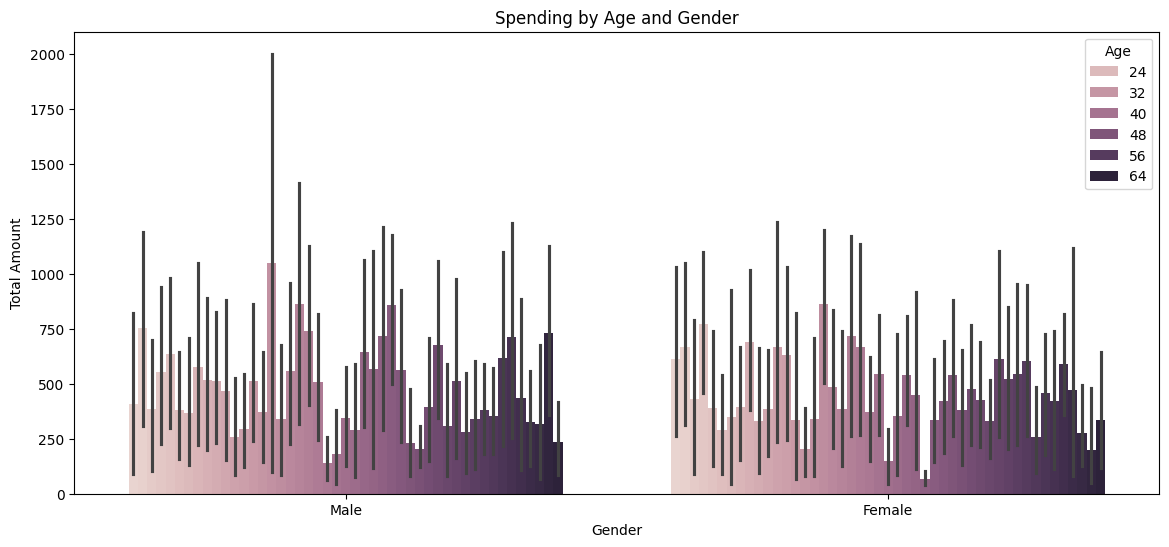

In [33]:
# Distribution of total spending by Age and Gender
plt.figure(figsize=(14,6))
sns.barplot(x='Gender', y='Total Amount', hue='Age', data=df)
plt.title('Spending by Age and Gender')
plt.show()

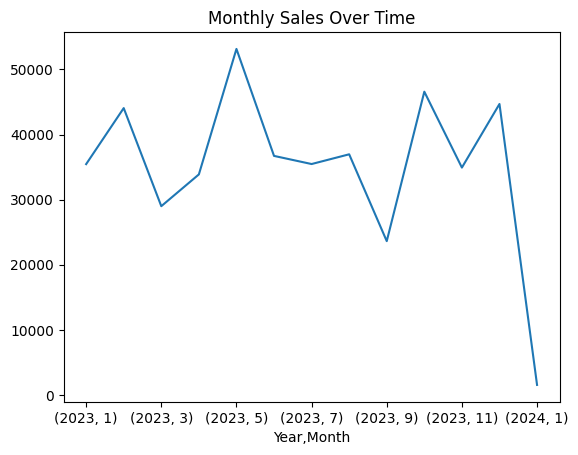

In [10]:
# Time series analysis of sales
df.groupby(['Year', 'Month'])['Total Amount'].sum().plot()
plt.title('Monthly Sales Over Time')
plt.show()

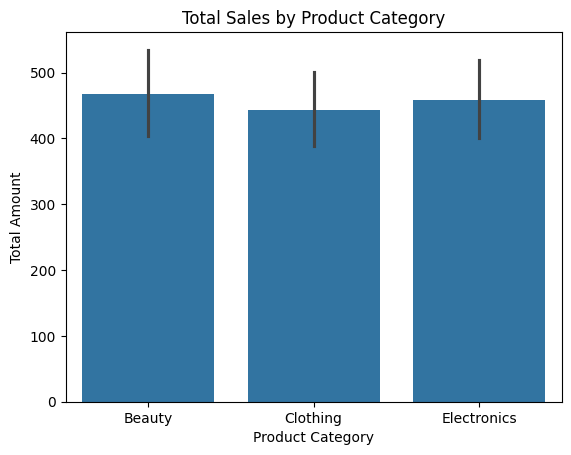

In [11]:
# Plot total sales by Product Category
sns.barplot(x='Product Category', y='Total Amount', data=df)
plt.title('Total Sales by Product Category')
plt.show()

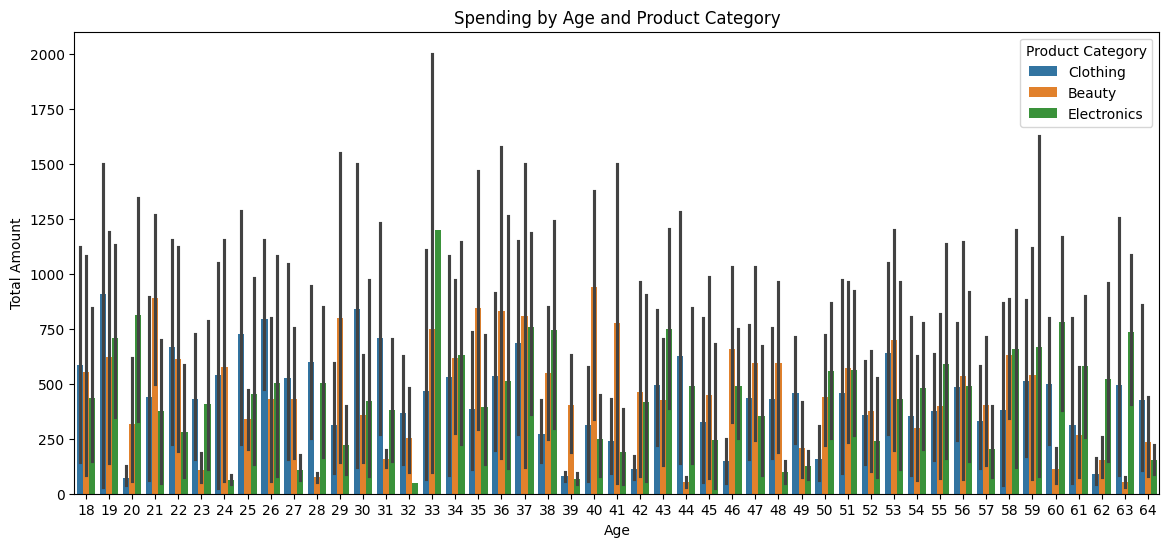

In [31]:
# Spending by Age Group and Product Category
plt.figure(figsize=(14,6))
sns.barplot(x='Age', y='Total Amount', hue='Product Category', data=df)
plt.title('Spending by Age and Product Category')
plt.show()

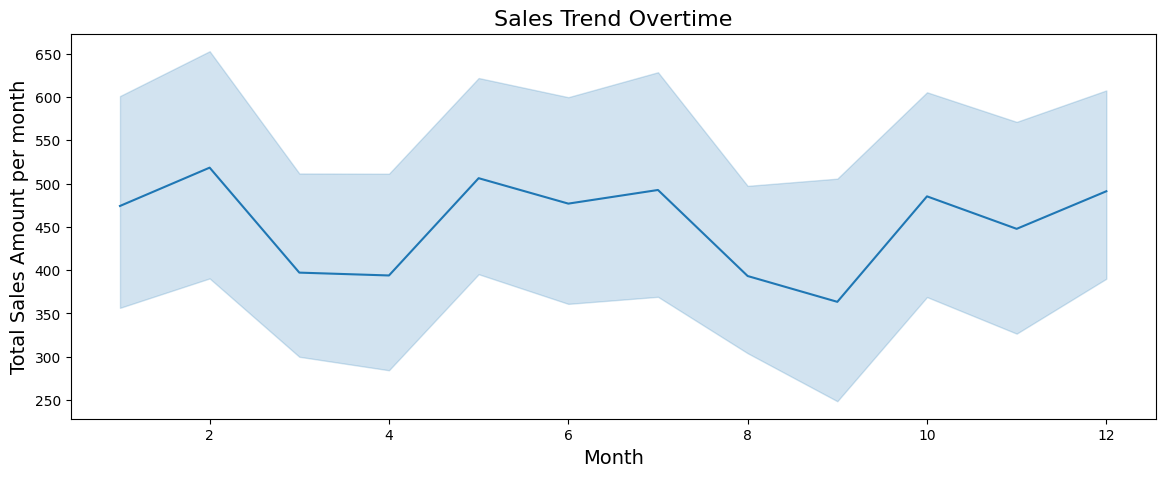

In [40]:
# Sales trends Overtime
plt.figure(figsize=(14,5))
sns.lineplot(x='Month', y='Total Amount', data= df)
plt.title('Sales Trend Overtime', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount per month', fontsize=14)
plt.show()

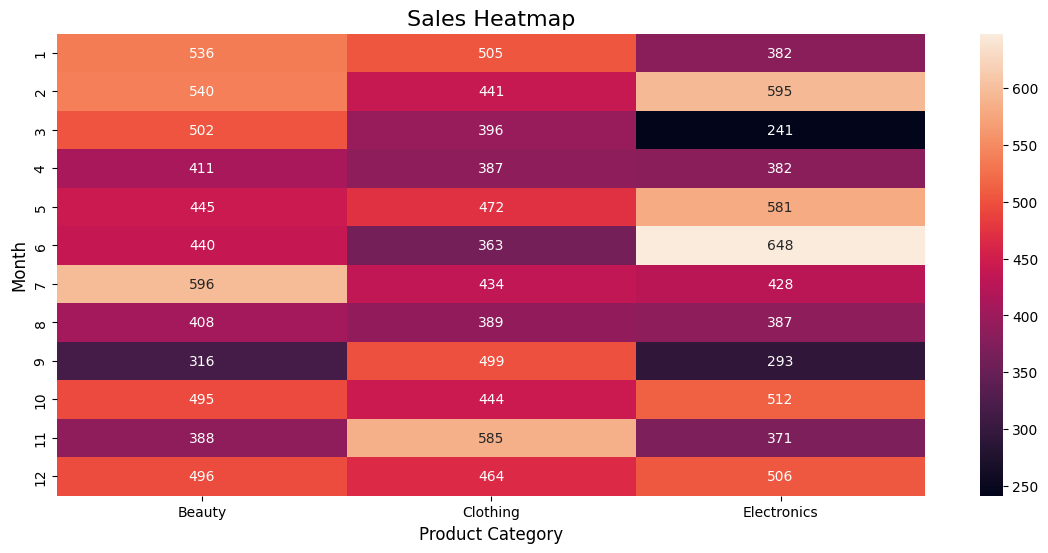

In [37]:
# Sales of Product Categories per month
heatmap = df.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(14,6))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.show()

In [43]:
# binning Age 
age_bins = [0, 18, 25, 35, 50, 100]
age_group = ['0-18', '19-25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(df['Age'], bins = age_bins, labels=age_group)
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Age Group
0,2023-11-24,Male,34,Beauty,3,50,150,11,2023,26-35
1,2023-02-27,Female,26,Clothing,2,500,1000,2,2023,26-35
2,2023-01-13,Male,50,Electronics,1,30,30,1,2023,36-50
3,2023-05-21,Male,37,Clothing,1,500,500,5,2023,36-50
4,2023-05-06,Male,30,Beauty,2,50,100,5,2023,26-35


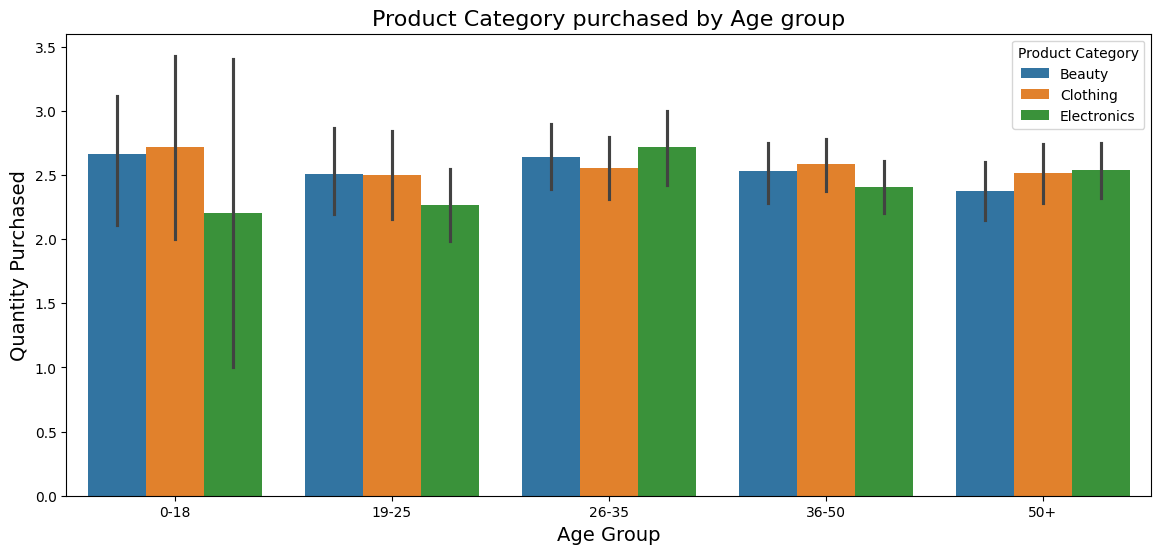

In [44]:
# bar plot 
plt.figure(figsize=(14,6))
sns.barplot(x='Age Group', y='Quantity', hue= 'Product Category', data=df)
plt.title('Product Category purchased by Age group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Quantity Purchased', fontsize=14)
plt.show()

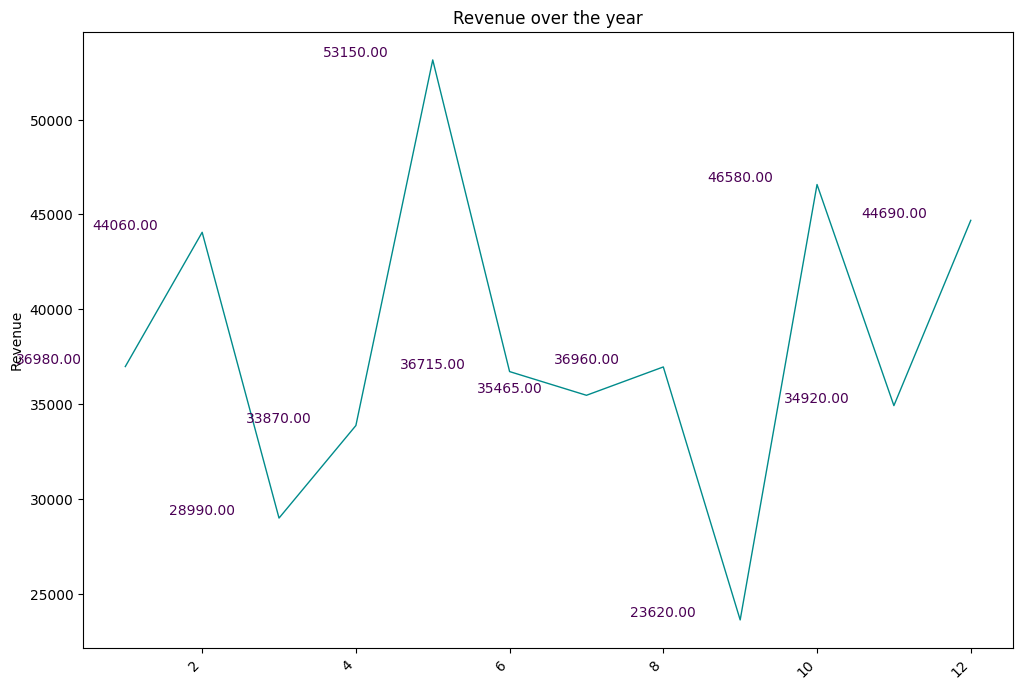

In [47]:
# Revenue over the year

# Create the monthly totals DataFrame
monthly_totals = df.groupby('Month')['Total Amount'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Total Amount', data=monthly_totals, color='#008B8B', linewidth=1)

# Add labels and title
plt.title('Revenue over the year')
plt.xlabel('')
plt.ylabel('Revenue')

# Add data labels
for i, total in enumerate(monthly_totals['Total Amount']):
    plt.text(i, total, f"{total:.2f}", va='bottom', ha='center', color='#4B0055', fontsize=10)

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()


<Figure size 1200x800 with 0 Axes>

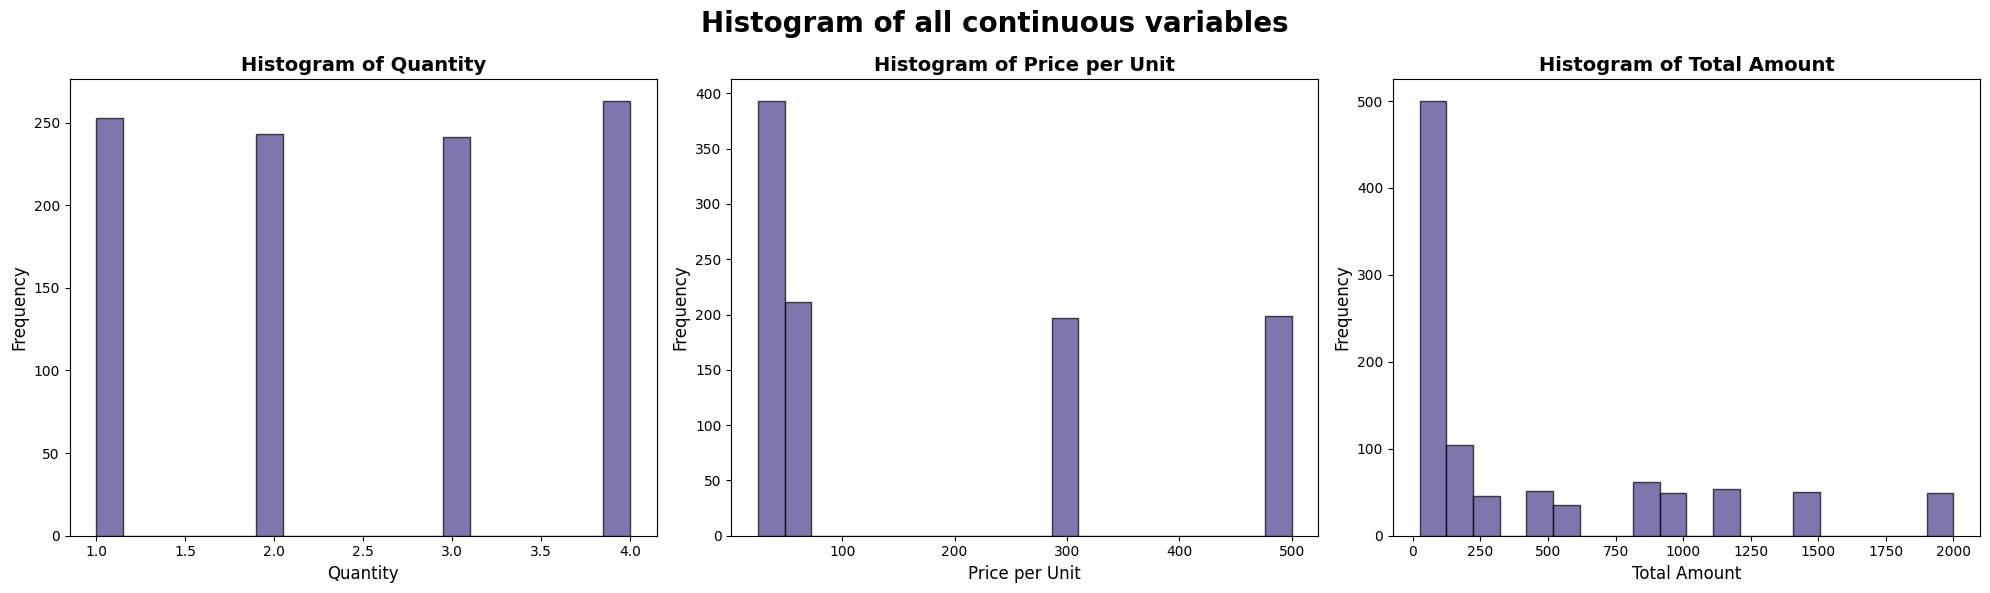

In [50]:
# frequency of the continues variables
df_ = df[['Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']]

# Create the histogram plot
plt.figure(figsize=(12, 8))

# Plot the histograms
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].hist(df_['Quantity'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[0].set_title('Histogram of Quantity', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Quantity', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)

axs[1].hist(df_['Price per Unit'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[1].set_title('Histogram of Price per Unit', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Price per Unit', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)

axs[2].hist(df_['Total Amount'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[2].set_title('Histogram of Total Amount', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Total Amount', fontsize=12)
axs[2].set_ylabel('Frequency', fontsize=12)

plt.suptitle('Histogram of all continuous variables', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

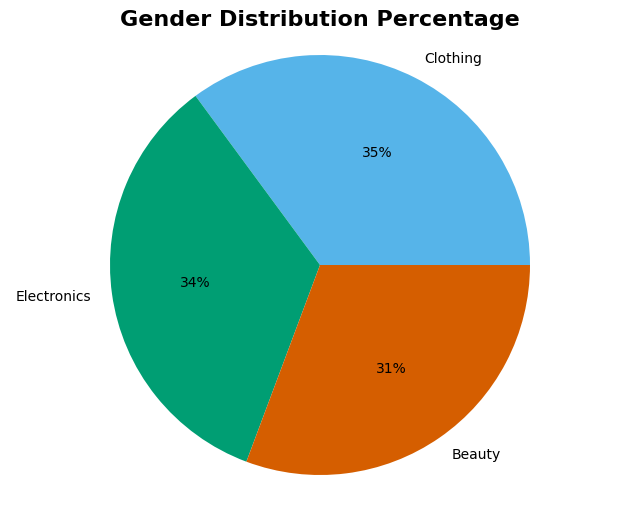

In [51]:
cate_counts = df['Product Category'].value_counts()

# Calculate the gender distribution percentage
cate_dist = (cate_counts / cate_counts.sum()) * 100
cate_dist = cate_dist.reset_index()
cate_dist.columns = ['Product Category', 'Percentage']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(cate_dist['Percentage'], labels=cate_dist['Product Category'], autopct='%.0f%%', colors=['#56b4e9', '#009e73','#d55e00'])

# Add a title and make the plot circular
plt.title('Gender Distribution Percentage', fontsize=16, fontweight='bold')
plt.axis('equal')

# Display the plot
plt.show()

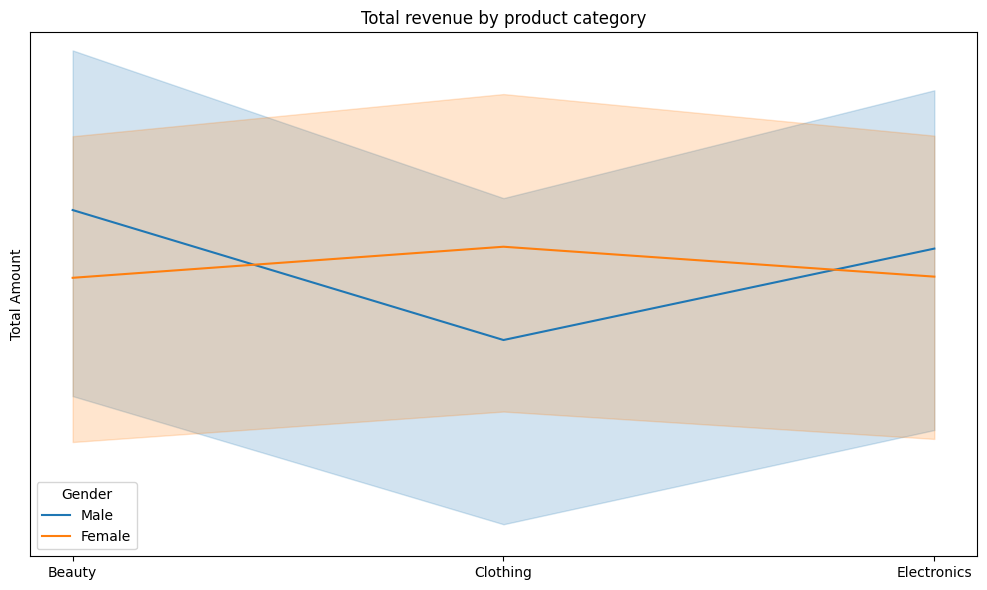

In [52]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Product Category", y="Total Amount", hue="Gender", data=df)

# Customize the plot
plt.title("Total revenue by product category")
plt.xlabel("")
# plt.ylabel("Total revenue")
plt.yscale("symlog")
plt.tight_layout()

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), ","), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), 
                      textcoords='offset points', fontsize=10, fontweight='bold')

plt.show()

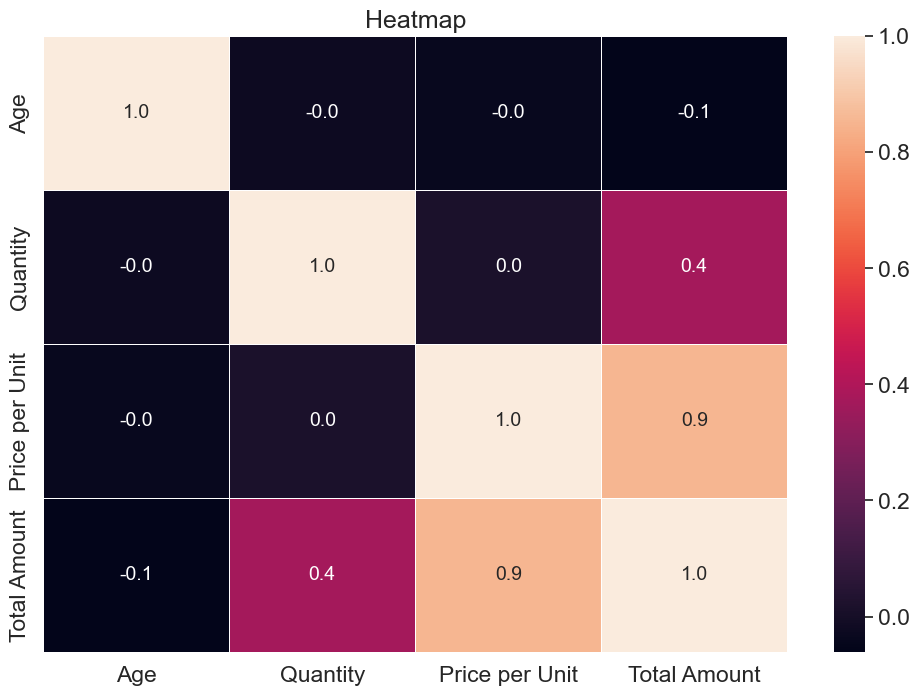

In [53]:
correlation=df[df.dtypes[df.dtypes == 'int64'].index].corr()
sns.set(font_scale=1.5)
plt.figure(figsize = (12,8))
plt.title("Heatmap", fontsize=18)
ax = sns.heatmap(correlation, annot=True,annot_kws={"size": 14},fmt='.1f', linewidths=.5)